In [1]:
import pandas as pd
import numpy as np

In [45]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')

In [46]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [47]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [48]:
dataset.drop(columns=['society','balcony','availability', 'area_type'] , inplace=True)

In [49]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [50]:
dataset['location'] = dataset['location'].fillna('Whitefield')

In [51]:
dataset['size'] = dataset['size'].fillna('2 BHK')

In [52]:
dataset['bath'] = dataset['bath'].fillna(dataset['bath'].median())

In [53]:
dataset.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [54]:
dataset['BHK'] = dataset['size'].str.split().str.get(0).astype(int)

In [55]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [56]:
dataset['total_sqft']


0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [57]:
def range_converer(x):
    N = x.split('-')
    if len(N) == 2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [58]:
dataset['total_sqft'] = dataset['total_sqft'].apply(range_converer)

In [59]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [60]:
dataset['price_per_sqft'] = (dataset['price']*100000)/dataset['total_sqft']

In [61]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [62]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1305,), dtype=object)

In [63]:
dataset['location'] = dataset['location'].apply(lambda x:x.strip())

In [64]:
location_count = dataset['location'].value_counts()

In [65]:
location_count

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

In [66]:
location_count_less = location_count[location_count <=15]
location_count_less

location
Kodihalli                               15
Nagavarapalya                           15
Varthur Road                            15
Benson Town                             15
Chamrajpet                              15
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1113, dtype: int64

In [67]:
dataset['location'] = dataset['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [68]:
dataset['location'].value_counts()

location
other                    3646
Whitefield                542
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Banashankari Stage VI      16
Cooke Town                 16
Banashankari Stage II      16
Judicial Layout            16
Sector 2 HSR Layout        16
Name: count, Length: 182, dtype: int64

In [69]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1531.448708,2.688814,112.565627,2.802778,7.629203e+04
std,1243.564986,1.338754,148.971674,1.294496,8.111395e+05
min,0.500000,1.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,50.000000,2.000000,4.284323e+03
50%,1265.000000,2.000000,72.000000,3.000000,5.497606e+03
75%,1660.000000,3.000000,120.000000,3.000000,7.486711e+03
max,52272.000000,40.000000,3600.000000,43.000000,3.180000e+07


In [70]:
dataset = dataset[(dataset['total_sqft']/dataset['BHK'])>=300]
dataset = dataset[dataset['BHK'] <= 5]
dataset = dataset[dataset['bath'] <= 5]

In [71]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.464600,104.405309,2.569553,6227.897981
std,1110.464023,0.851249,128.601046,0.783795,4010.477759
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1111.000000,2.000000,48.950000,2.000000,4200.279518
50%,1290.000000,2.000000,69.000000,2.000000,5284.861974
75%,1658.250000,3.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,2912.000000,5.000000,176470.588235


In [72]:
dataset.shape

(12034, 7)

In [73]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [74]:
dataset = dataset[['location', 'total_sqft' , 'BHK' , 'bath' , 'price']]

In [75]:
lower_limit=dataset['price'].mean()-dataset['price'].std()*3
upper_limit=dataset['price'].mean()+dataset['price'].std()*3
dataset['price']=np.where(dataset['price']>upper_limit,
                     upper_limit,
                     np.where(dataset['price']<lower_limit,lower_limit,dataset['price']))

In [76]:
dataset.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


In [77]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [1]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

NameError: name 'X' is not defined

In [79]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder() , ['location']),
        ('scaler' , StandardScaler() , ['total_sqft' ,'BHK' ,'bath'])
    ],
    remainder='passthrough'
)

In [80]:
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(learning_rate=0.5 , n_estimators=80)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)

In [81]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct , model)

In [82]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [83]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [84]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.7066740923760975


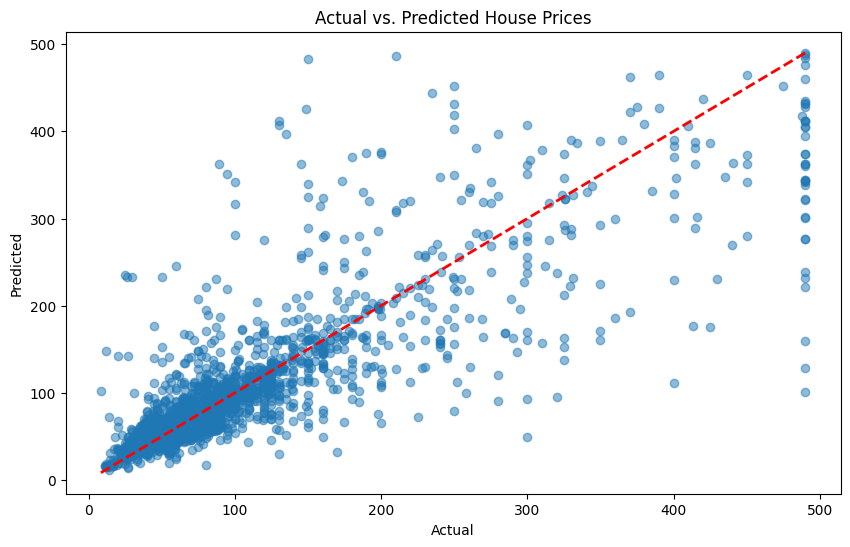

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [86]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(dataset , open('dataset.pkl','wb'))